In [66]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
data=pd.read_csv('banktransaction.csv')

In [68]:
Unchanged_data=data.copy()

data.drop(['date'],axis=1)

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud
0,cash-in,30105,28942,494528,1,type1
1,cash-in,30105,8692,494528,1,type1
2,cash-in,30105,60094,494528,1,type1
3,cash-in,30105,20575,494528,1,type1
4,cash-in,30105,45938,494528,1,type1
...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,0,none
2336,transfer,9532,43793,106907,0,none
2337,transfer,27332,43793,106907,0,none
2338,transfer,32685,43793,106907,0,none


In [69]:
label_encoder = preprocessing.LabelEncoder() 

data['typeofaction']= label_encoder.fit_transform(data['typeofaction']) 

data['typeofaction'].unique() 


array([0, 1])

In [70]:
typeoffraud=data['typeoffraud']
data.drop(['date'],inplace=True,axis=1
         )
data.drop(['typeoffraud'],inplace=True,axis=1
         )

<Axes: ylabel='sourceid'>

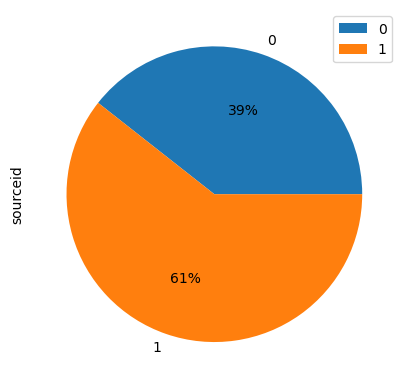

In [71]:
data.groupby(['isfraud']).sum().plot(kind='pie', y='sourceid',autopct='%1.0f%%')

In [72]:
X=data.drop(['isfraud'],axis=1
         )
y=data['isfraud']

In [73]:
X.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney'], dtype='object')

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### XG

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)
auc = metrics.roc_auc_score(y_test, xgb_y_predict)
print(auc)
print(xgb_score)

0.9568106312292358
0.9663648124191462


### LR


In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf_pred=clf.predict(x_test)
clf_score = accuracy_score(clf_pred, y_test)
auc = metrics.roc_auc_score(y_test, clf_pred)
print(auc)
print(clf_score)


0.5022629371023143
0.6119016817593791


### Multiple model 


In [77]:
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

In [78]:
outcome=list()
model_names=list()
for model_name, model in models:
    model_name = model.fit(x_train, y_train)
    model_name_pred=model_name.predict(x_test)
    model_name_score = accuracy_score(model_name_pred, y_test)
    auc = metrics.roc_auc_score(y_test, model_name_pred)
    print(model_name)
    print(auc)
    print(model_name_score)

LogisticRegression()
0.5022629371023143
0.6119016817593791
SVC()
0.8222345008164874
0.8564036222509702
DecisionTreeClassifier()
0.9450137958218369
0.9534282018111255
KNeighborsClassifier()
0.8906293991778816
0.906856403622251
LinearDiscriminantAnalysis()
0.5162241680274791
0.6054333764553687
GaussianNB()
0.6615378118137283
0.7270375161707633


In [80]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs          Score
3  amountofmoney  296031.222043
2  destinationid  265713.164204
1       sourceid   31801.039523
0   typeofaction       2.591578


In [81]:
import numpy as np
def prep_data(data: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = data.iloc[:].values
    y = data.isfraud.values
    return X, y
X, y = prep_data(data)

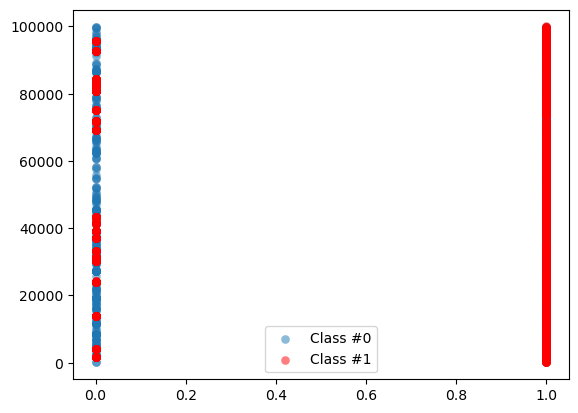

In [82]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()
plot_data(X, y)

### Over sampling

In [83]:
from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler(random_state=42)
X_resampled, y_resampled =  method.fit_resample(X, y)

X_resampled

array([[      0,   30105,   28942,  494528,       1],
       [      0,   30105,    8692,  494528,       1],
       [      0,   30105,   60094,  494528,       1],
       ...,
       [      0,   69663,   51624, 3530283,       0],
       [      0,   82930,   39266, 6445058,       0],
       [      1,   87134,   43793,  106907,       0]])

In [86]:
newdata = pd.DataFrame(X_resampled, columns = ['1','2','3','4','5'])
newdata['9']=pd.DataFrame(y_resampled)

<Axes: ylabel='2'>

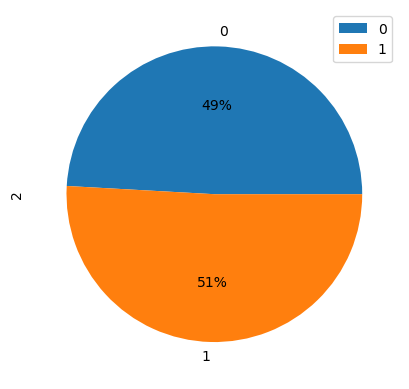

In [87]:
newdata.groupby(['9']).sum().plot(kind='pie', y='2',autopct='%1.0f%%')

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

In [89]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf_pred=clf.predict(x_test)
clf_score = accuracy_score(clf_pred, y_test)
auc = metrics.roc_auc_score(y_test, clf_pred)
print(auc)
print(clf_score)

0.5128989635849093
0.5140692640692641


In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)
auc = metrics.roc_auc_score(y_test, xgb_y_predict)
print(auc)
print(xgb_score)

1.0
1.0
